In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import sklearn.model_selection as ms
#from xgboost import XGBClassifier
#from xgboost import XGBRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#import lightgbm as lgbm
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [2]:
#import datasets

train = pd.read_csv("train.csv", encoding = "ISO-8859-1")
test = pd.read_csv("test.csv", encoding = "ISO-8859-1")


In [3]:
#check for missing         data
train.isnull().sum()

id                   0
bedrooms             0
bathrooms            0
toilets              0
parking              0
description          0
other_description    0
location             0
spec_location        0
price                0
dtype: int64

In [4]:
#merge train and test
train2 = train.append(test,ignore_index = True)

In [5]:
train2['estate_flag'] = train2['spec_location'].apply(lambda x: len([c for c in str(x).lower().split() if "estate" in c or "phase" in c]))
train2['terrace_flag'] = train2['other_description'].apply(lambda x: len([c for c in str(x).lower().split() if "terraced" 
                                                                  in c or "terrace" in c or "detached" in c
                                                                 or "duplex" in c]))
train2['new_flag'] = train2['other_description'].apply(lambda x: len([c for c in str(x).lower().split()
                                                              if "new" in c or "luxur" in c 
                                                              or "executive" in c]))
train2['serviced_flag'] = train2['other_description'].apply(lambda x: len([c for c in str(x).lower().split() if "service" in c]))
train2['mini_flag'] = train2['other_description'].apply(lambda x: len([c for c in str(x).lower().split() if "mini" in c]))


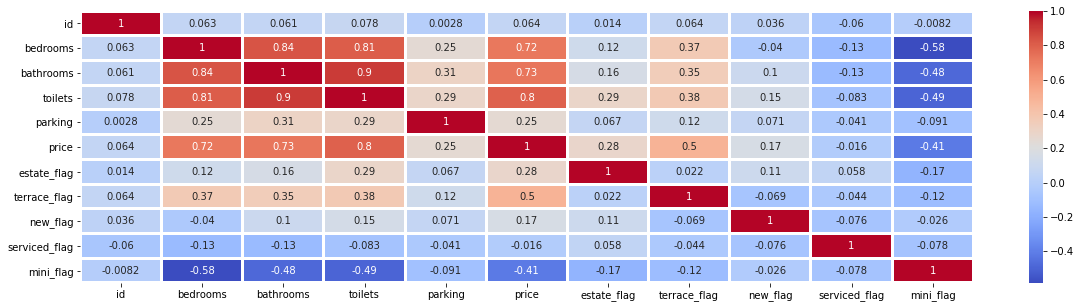

In [6]:
corr= train2.corr()
#corr
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True)

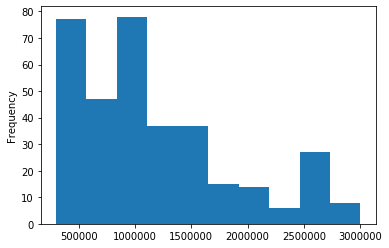

In [7]:
#Examine distribution of all houses to identify outliers
train2['price'].plot(kind="hist")

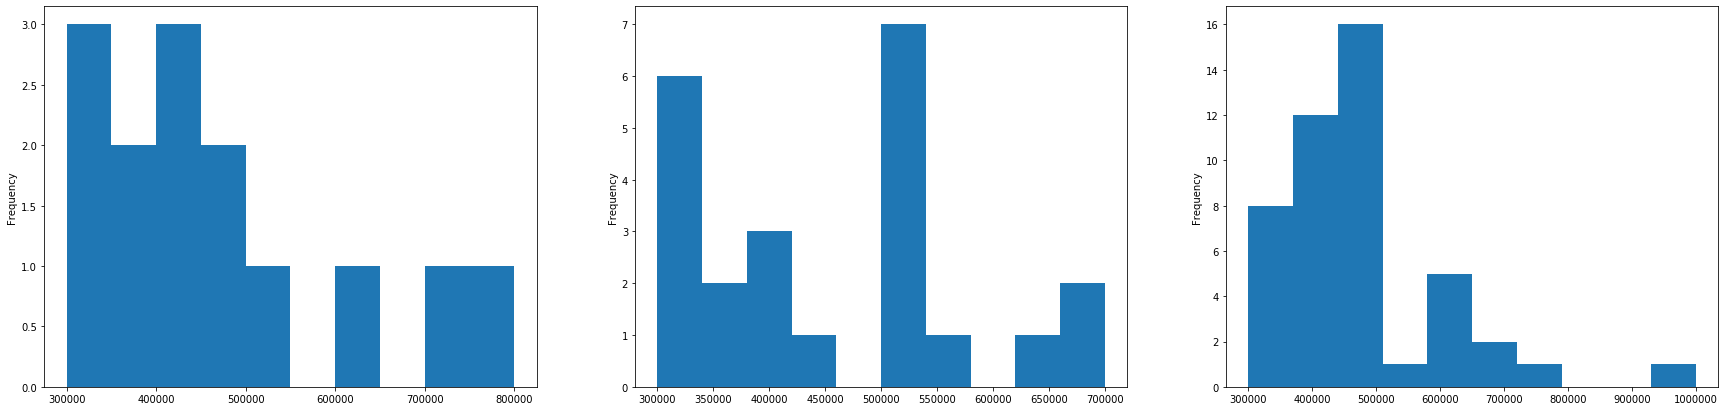

In [8]:
#Inspect the distribution of houses per location and size of house
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,7))
fig.add_subplot(1, 3, 1)
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==1)].plot(kind="hist")
fig.add_subplot(1, 3, 2)
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==1)].plot(kind="hist")
fig.add_subplot(1, 3, 3)
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==1)].plot(kind="hist")

In [9]:
#Since some houses may have missing info it means some estate/serviced houses are not called estate/serviced houses. 
#Assumptions are made around houses which are not identified as estate/ service houses. 
#The median/50th percentile of those houses is identified and any house above the median is considered as estate.
#Houses higher than 80th percentile are classified as serviced


estate_price = []
import numpy as np
for location in ["gbagada","surulere","yaba"]:
    for i in range(1,6):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50)
            d['serviced_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80)
        except (IndexError,TypeError) as e:
            d['serviced_price'] = 0
            d['estate_price'] = 0
        estate_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in gbagada :  450000.0
This is the median for 2 bedroom in gbagada :  900000.0
This is the median for 3 bedroom in gbagada :  1200000.0
This is the median for 4 bedroom in gbagada :  2200000.0
This is the median for 5 bedroom in gbagada :  2500000.0
This is the median for 1 bedroom in surulere :  475000.0
This is the median for 2 bedroom in surulere :  950000.0
This is the median for 3 bedroom in surulere :  1300000.0
This is the median for 4 bedroom in surulere :  2500000.0
This is the median for 5 bedroom in surulere :  2500000.0
This is the median for 1 bedroom in yaba :  475000.0
This is the median for 2 bedroom in yaba :  750000.0
This is the median for 3 bedroom in yaba :  1300000.0
This is the median for 4 bedroom in yaba :  2000000.0
This is the median for 5 bedroom in yaba :  0


In [10]:
estate_price = []
import numpy as np
for location in ["gbagada","surulere","yaba"]:
    for i in range(1,6):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50)
            d['serviced_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80)
        except (IndexError,TypeError) as e:
            d['serviced_price'] = 0
            d['estate_price'] = 0
        estate_price.append(d)  
        try:
                print("This is the 80 percentile for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80))
        except (IndexError,TypeError) as e:
                         print("This is the 80 percentile for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the 80 percentile for 1 bedroom in gbagada :  600000.0
This is the 80 percentile for 2 bedroom in gbagada :  1000000.0
This is the 80 percentile for 3 bedroom in gbagada :  1500000.0
This is the 80 percentile for 4 bedroom in gbagada :  2260000.0
This is the 80 percentile for 5 bedroom in gbagada :  2500000.0
This is the 80 percentile for 1 bedroom in surulere :  500000.0
This is the 80 percentile for 2 bedroom in surulere :  1200000.0
This is the 80 percentile for 3 bedroom in surulere :  1720000.0000000002
This is the 80 percentile for 4 bedroom in surulere :  2700000.0
This is the 80 percentile for 5 bedroom in surulere :  2800000.0
This is the 80 percentile for 1 bedroom in yaba :  550000.0
This is the 80 percentile for 2 bedroom in yaba :  1000000.0
This is the 80 percentile for 3 bedroom in yaba :  2000000.0
This is the 80 percentile for 4 bedroom in yaba :  2600000.0
This is the 80 percentile for 5 bedroom in yaba :  0


In [11]:
#save the output in a dataframe and in order to merge with original dataframe
estate_price=pd.DataFrame(estate_price)
estate_price['locationbed'] = estate_price['location'] + estate_price['bedspace'].astype(str)
estate_price = estate_price.drop(["location","bedspace"],axis=1)


In [12]:
estate_price.head()

,estate_price,serviced_price,locationbed
0,450000.0,600000.0,gbagada1
1,900000.0,1000000.0,gbagada2
2,1200000.0,1500000.0,gbagada3
3,2200000.0,2260000.0,gbagada4
4,2500000.0,2500000.0,gbagada5


In [13]:
#merge to original dataframe to create new dataframe
train2['locationbed']  = train2 ['location'] + train2 ['bedrooms'].astype(str)
train3 = pd.merge(train2,estate_price, on ="locationbed", how = "left")

In [14]:
#identify estate houses that were not called estate houses by assigning houses greater than median as estate houses
#identify serviced houses that were not called serviced houses by assigning houses greater than 80th percentile as serviced houses
#terrace houses are typically greater than 1.8m based on distribution
train3['estate_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['estate_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['serviced_price'])] = 1

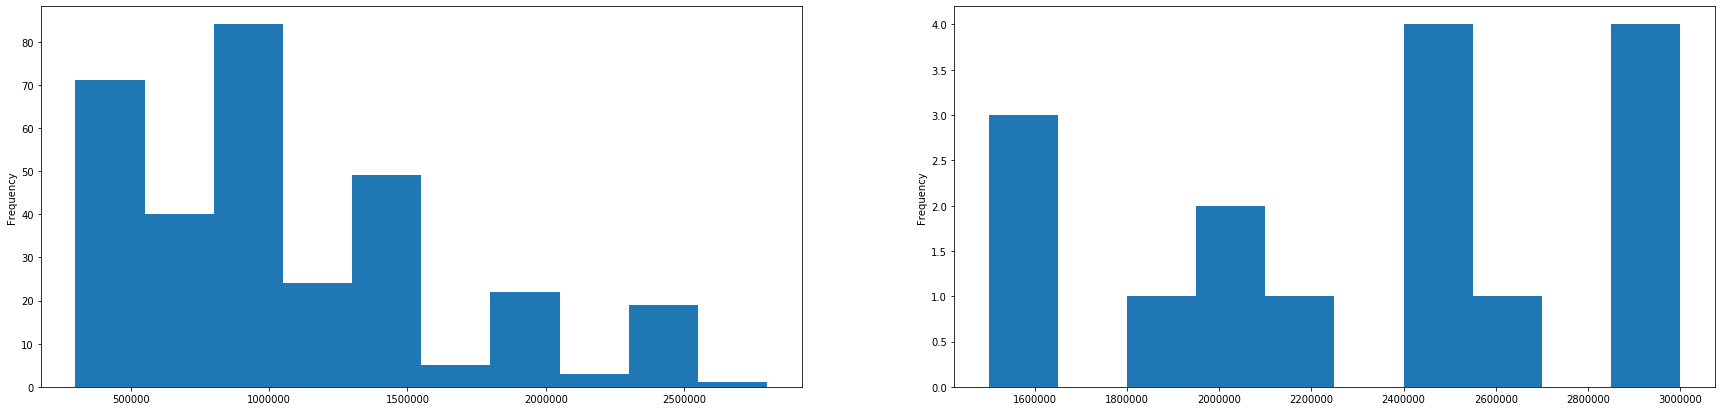

In [15]:
#inspect houses that are terrace/duplex/detached to see if they are typically higher 
fig = plt.figure(figsize=(30,7))
fig.add_subplot(1, 2, 1)
train3['price'][train3['terrace_flag']==0].plot(kind="hist")
fig.add_subplot(1, 2, 2)
train3['price'][train3['terrace_flag']==1].plot(kind="hist")

In [16]:
#terrace houses are typically>1.8m from the above chart
train3['terrace_flag'][train3['price'] > 1800000] = 1

In [17]:
#Location is not giving the best results as a feature, however merging location and number of beds and ranking that 
#gives your model a better and stronger feature because the lower the rank, the lower the price.
g = train3.groupby(['location','bedrooms'])['price'].median().reset_index().sort_values('price')
g['location_rank']= g['price'].rank()#np.linspace(1,14,14)
g['location_rank'] = g['location_rank'].astype(int)
g['locationbed'] = g['location'] + g ['bedrooms'].astype(str)
g = g.drop(["price","location","bedrooms"],axis=1)
g.columns

Index(['location_rank', 'locationbed'], dtype='object')

In [18]:
#merge to dataframe
train3 = pd.merge(train3,g, on ="locationbed", how = "left")

In [19]:
train3

,id,bedrooms,bathrooms,toilets,parking,description,other_description,location,spec_location,price,estate_flag,terrace_flag,new_flag,serviced_flag,mini_flag,locationbed,estate_price,serviced_price,location_rank
0,9026,2,2,3,5,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Off Adekunle Kuye Street., Kilo, Surulere, Lagos",1000000,1,0,0,0,0,surulere2,950000.0,1200000.0,5
1,40390,1,1,1,1,1 bedroom mini flat for rent,Mini Flat,surulere,"Nnobi Street, Kilo, Surulere, Lagos",370000,0,0,0,0,1,surulere1,475000.0,500000.0,2
2,85193,2,2,3,2,2 bedroom flat for rent,Relatively New 2bedroom Flat Apartment,gbagada,"Atunrase Estate, Gbagada, Lagos",1100000,1,0,1,1,0,gbagada2,900000.0,1000000.0,6
3,14410,1,1,1,1,1 bedroom self contained (single rooms) for rent,Luxurious Room Self Contained,gbagada,"Ola Adebiyi Street Peace Estate, Soluyi, Gbaga...",400000,1,0,1,0,0,gbagada1,450000.0,600000.0,1
4,86032,3,2,2,2,3 bedroom flat for rent,Renovated 3 Bedrooms Ground Flat,gbagada,"Soluyi, Gbagada, Lagos",1200000,0,0,0,0,0,gbagada3,1200000.0,1500000.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,97534,2,3,3,8,2 bedroom flat for rent,Luxury 2 Bedroom Apartment,yaba,"Fola Agoro, Yaba, Lagos",1000000,1,0,1,0,0,yaba2,750000.0,1000000.0,4
342,97547,3,3,4,2,3 bedroom flat for rent,Brand New Exquisitely Finished Block Of 9 Nos ...,gbagada,"Gbagada, Lagos",2500000,1,1,1,1,0,gbagada3,1200000.0,1500000.0,9
343,99003,2,2,2,4,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Kilo, Surulere, Lagos",800000,0,0,0,0,0,surulere2,950000.0,1200000.0,5
344,99021,3,3,4,2,3 bedroom flat for rent,Luxury And Exquisitely Finished 3 Bedrooms Apa...,yaba,"Off Apapa Road, Ebute Metta West, Yaba, Lagos",1200000,0,0,1,0,0,yaba3,1300000.0,2000000.0,7


In [20]:
#make similar assumptions for new/luxurious/executive houses which were not classified as that
new_price = []
import numpy as np
for location in ["gbagada","surulere","yaba"]:
    for i in range(1,6):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50)
            d['new_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['new_flag']==0)],60)
        except (IndexError,TypeError) as e:
            d['new_price'] = 0
            d['estate_price'] = 0
        new_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in gbagada :  600000.0
This is the median for 2 bedroom in gbagada :  1000000.0
This is the median for 3 bedroom in gbagada :  1500000.0
This is the median for 4 bedroom in gbagada :  2260000.0
This is the median for 5 bedroom in gbagada :  2500000.0
This is the median for 1 bedroom in surulere :  500000.0
This is the median for 2 bedroom in surulere :  1200000.0
This is the median for 3 bedroom in surulere :  1720000.0000000002
This is the median for 4 bedroom in surulere :  2700000.0
This is the median for 5 bedroom in surulere :  2800000.0
This is the median for 1 bedroom in yaba :  550000.0
This is the median for 2 bedroom in yaba :  1000000.0
This is the median for 3 bedroom in yaba :  2000000.0
This is the median for 4 bedroom in yaba :  2600000.0
This is the median for 5 bedroom in yaba :  0


In [21]:
new_price = pd.DataFrame(new_price)
new_price['locationbed'] = new_price['location'] + new_price['bedspace'].astype(str)
new_price = new_price.drop(["estate_price","location","bedspace"],axis=1)
new_price

,new_price,locationbed
0,450000.0,gbagada1
1,900000.0,gbagada2
2,1500000.0,gbagada3
3,2220000.0,gbagada4
4,2800000.0,gbagada5
5,420000.0,surulere1
6,920000.0,surulere2
7,1460000.0,surulere3
8,2500000.0,surulere4
9,2600000.0,surulere5


In [22]:
train3 = pd.merge(train3,new_price, on ="locationbed", how = "left")

In [23]:
train3

,id,bedrooms,bathrooms,toilets,parking,description,other_description,location,spec_location,price,estate_flag,terrace_flag,new_flag,serviced_flag,mini_flag,locationbed,estate_price,serviced_price,location_rank,new_price
0,9026,2,2,3,5,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Off Adekunle Kuye Street., Kilo, Surulere, Lagos",1000000,1,0,0,0,0,surulere2,950000.0,1200000.0,5,920000.0
1,40390,1,1,1,1,1 bedroom mini flat for rent,Mini Flat,surulere,"Nnobi Street, Kilo, Surulere, Lagos",370000,0,0,0,0,1,surulere1,475000.0,500000.0,2,420000.0
2,85193,2,2,3,2,2 bedroom flat for rent,Relatively New 2bedroom Flat Apartment,gbagada,"Atunrase Estate, Gbagada, Lagos",1100000,1,0,1,1,0,gbagada2,900000.0,1000000.0,6,900000.0
3,14410,1,1,1,1,1 bedroom self contained (single rooms) for rent,Luxurious Room Self Contained,gbagada,"Ola Adebiyi Street Peace Estate, Soluyi, Gbaga...",400000,1,0,1,0,0,gbagada1,450000.0,600000.0,1,450000.0
4,86032,3,2,2,2,3 bedroom flat for rent,Renovated 3 Bedrooms Ground Flat,gbagada,"Soluyi, Gbagada, Lagos",1200000,0,0,0,0,0,gbagada3,1200000.0,1500000.0,9,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,97534,2,3,3,8,2 bedroom flat for rent,Luxury 2 Bedroom Apartment,yaba,"Fola Agoro, Yaba, Lagos",1000000,1,0,1,0,0,yaba2,750000.0,1000000.0,4,740000.0
342,97547,3,3,4,2,3 bedroom flat for rent,Brand New Exquisitely Finished Block Of 9 Nos ...,gbagada,"Gbagada, Lagos",2500000,1,1,1,1,0,gbagada3,1200000.0,1500000.0,9,1500000.0
343,99003,2,2,2,4,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Kilo, Surulere, Lagos",800000,0,0,0,0,0,surulere2,950000.0,1200000.0,5,920000.0
344,99021,3,3,4,2,3 bedroom flat for rent,Luxury And Exquisitely Finished 3 Bedrooms Apa...,yaba,"Off Apapa Road, Ebute Metta West, Yaba, Lagos",1200000,0,0,1,0,0,yaba3,1300000.0,2000000.0,7,1060000.0


In [24]:
#assign houses to new/luxurious/executive based on price
train3['new_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['new_price'])] = 1

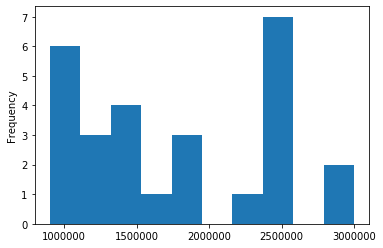

In [25]:
#Conduct additional inspoection for each location and type of house
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==3)&(train2['new_flag']==1)].plot(kind="hist")

In [26]:
train3

,id,bedrooms,bathrooms,toilets,parking,description,other_description,location,spec_location,price,estate_flag,terrace_flag,new_flag,serviced_flag,mini_flag,locationbed,estate_price,serviced_price,location_rank,new_price
0,9026,2,2,3,5,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Off Adekunle Kuye Street., Kilo, Surulere, Lagos",1000000,1,0,1,0,0,surulere2,950000.0,1200000.0,5,920000.0
1,40390,1,1,1,1,1 bedroom mini flat for rent,Mini Flat,surulere,"Nnobi Street, Kilo, Surulere, Lagos",370000,0,0,0,0,1,surulere1,475000.0,500000.0,2,420000.0
2,85193,2,2,3,2,2 bedroom flat for rent,Relatively New 2bedroom Flat Apartment,gbagada,"Atunrase Estate, Gbagada, Lagos",1100000,1,0,1,1,0,gbagada2,900000.0,1000000.0,6,900000.0
3,14410,1,1,1,1,1 bedroom self contained (single rooms) for rent,Luxurious Room Self Contained,gbagada,"Ola Adebiyi Street Peace Estate, Soluyi, Gbaga...",400000,1,0,1,0,0,gbagada1,450000.0,600000.0,1,450000.0
4,86032,3,2,2,2,3 bedroom flat for rent,Renovated 3 Bedrooms Ground Flat,gbagada,"Soluyi, Gbagada, Lagos",1200000,0,0,0,0,0,gbagada3,1200000.0,1500000.0,9,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,97534,2,3,3,8,2 bedroom flat for rent,Luxury 2 Bedroom Apartment,yaba,"Fola Agoro, Yaba, Lagos",1000000,1,0,1,0,0,yaba2,750000.0,1000000.0,4,740000.0
342,97547,3,3,4,2,3 bedroom flat for rent,Brand New Exquisitely Finished Block Of 9 Nos ...,gbagada,"Gbagada, Lagos",2500000,1,1,1,1,0,gbagada3,1200000.0,1500000.0,9,1500000.0
343,99003,2,2,2,4,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Kilo, Surulere, Lagos",800000,0,0,0,0,0,surulere2,950000.0,1200000.0,5,920000.0
344,99021,3,3,4,2,3 bedroom flat for rent,Luxury And Exquisitely Finished 3 Bedrooms Apa...,yaba,"Off Apapa Road, Ebute Metta West, Yaba, Lagos",1200000,0,0,1,0,0,yaba3,1300000.0,2000000.0,7,1060000.0


In [27]:
#make similar assumptions for mini-flat houses which were not classified as that
miniflat_price = []
import numpy as np
for location in ["gbagada","surulere","yaba"]:
    for i in range(1,6):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50)
            d['miniflat_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['mini_flag']==0)],30)
        except (IndexError,TypeError) as e:
            d['miniflat_price'] = 0
            d['estate_price'] = 0
        miniflat_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],30))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in gbagada :  400000.0
This is the median for 2 bedroom in gbagada :  900000.0
This is the median for 3 bedroom in gbagada :  1000000.0
This is the median for 4 bedroom in gbagada :  2040000.0
This is the median for 5 bedroom in gbagada :  2500000.0
This is the median for 1 bedroom in surulere :  379000.0
This is the median for 2 bedroom in surulere :  900000.0
This is the median for 3 bedroom in surulere :  1170000.0
This is the median for 4 bedroom in surulere :  1960000.0
This is the median for 5 bedroom in surulere :  2300000.0
This is the median for 1 bedroom in yaba :  400000.0
This is the median for 2 bedroom in yaba :  605000.0
This is the median for 3 bedroom in yaba :  1000000.0
This is the median for 4 bedroom in yaba :  1360000.0
This is the median for 5 bedroom in yaba :  0


In [28]:
miniflat_price = pd.DataFrame(miniflat_price)
miniflat_price['locationbed'] = miniflat_price['location'] + miniflat_price['bedspace'].astype(str)
miniflat_price = miniflat_price.drop(["estate_price","location","bedspace"],axis=1)
miniflat_price

,miniflat_price,locationbed
0,348350.0,gbagada1
1,900000.0,gbagada2
2,1200000.0,gbagada3
3,1770000.0,gbagada4
4,2650000.0,gbagada5
5,300000.0,surulere1
6,900000.0,surulere2
7,1100000.0,surulere3
8,2080000.0,surulere4
9,2300000.0,surulere5


In [29]:
train3 = pd.merge(train3,miniflat_price, on ="locationbed", how = "left")

In [30]:
train3

,id,bedrooms,bathrooms,toilets,parking,description,other_description,location,spec_location,price,...,terrace_flag,new_flag,serviced_flag,mini_flag,locationbed,estate_price,serviced_price,location_rank,new_price,miniflat_price
0,9026,2,2,3,5,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Off Adekunle Kuye Street., Kilo, Surulere, Lagos",1000000,...,0,1,0,0,surulere2,950000.0,1200000.0,5,920000.0,900000.0
1,40390,1,1,1,1,1 bedroom mini flat for rent,Mini Flat,surulere,"Nnobi Street, Kilo, Surulere, Lagos",370000,...,0,0,0,1,surulere1,475000.0,500000.0,2,420000.0,300000.0
2,85193,2,2,3,2,2 bedroom flat for rent,Relatively New 2bedroom Flat Apartment,gbagada,"Atunrase Estate, Gbagada, Lagos",1100000,...,0,1,1,0,gbagada2,900000.0,1000000.0,6,900000.0,900000.0
3,14410,1,1,1,1,1 bedroom self contained (single rooms) for rent,Luxurious Room Self Contained,gbagada,"Ola Adebiyi Street Peace Estate, Soluyi, Gbaga...",400000,...,0,1,0,0,gbagada1,450000.0,600000.0,1,450000.0,348350.0
4,86032,3,2,2,2,3 bedroom flat for rent,Renovated 3 Bedrooms Ground Flat,gbagada,"Soluyi, Gbagada, Lagos",1200000,...,0,0,0,0,gbagada3,1200000.0,1500000.0,9,1500000.0,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,97534,2,3,3,8,2 bedroom flat for rent,Luxury 2 Bedroom Apartment,yaba,"Fola Agoro, Yaba, Lagos",1000000,...,0,1,0,0,yaba2,750000.0,1000000.0,4,740000.0,620000.0
342,97547,3,3,4,2,3 bedroom flat for rent,Brand New Exquisitely Finished Block Of 9 Nos ...,gbagada,"Gbagada, Lagos",2500000,...,1,1,1,0,gbagada3,1200000.0,1500000.0,9,1500000.0,1200000.0
343,99003,2,2,2,4,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Kilo, Surulere, Lagos",800000,...,0,0,0,0,surulere2,950000.0,1200000.0,5,920000.0,900000.0
344,99021,3,3,4,2,3 bedroom flat for rent,Luxury And Exquisitely Finished 3 Bedrooms Apa...,yaba,"Off Apapa Road, Ebute Metta West, Yaba, Lagos",1200000,...,0,1,0,0,yaba3,1300000.0,2000000.0,7,1060000.0,1000000.0


In [31]:
#assign houses to new/luxurious/executive based on price
train3['mini_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['miniflat_price'])] = 1
train3['mini_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['miniflat_price'])] = 1
train3['mini_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['miniflat_price'])] = 1
train3['mini_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['miniflat_price'])] = 1
train3['mini_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['miniflat_price'])] = 1

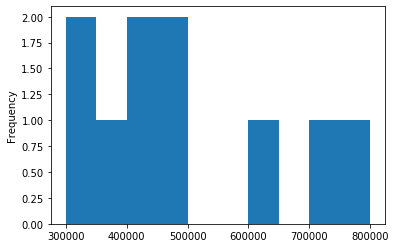

In [32]:
#Conduct additional inspoection for each location and type of house
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==1)&(train2['mini_flag']==1)].plot(kind="hist")

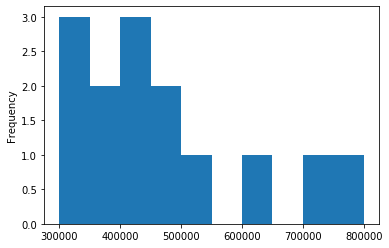

In [33]:
#Conduct additional inspoection for each location and type of house
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==1)].plot(kind="hist")

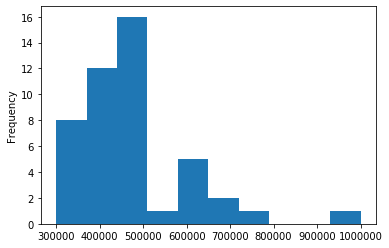

In [34]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==1)].plot(kind="hist")

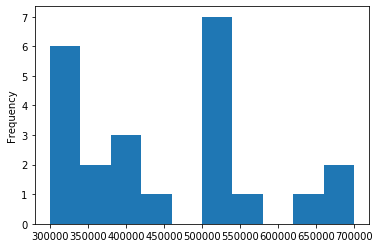

In [35]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==1)].plot(kind="hist")

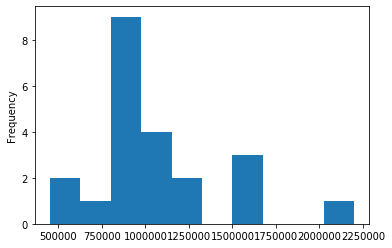

In [36]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==2)].plot(kind="hist")

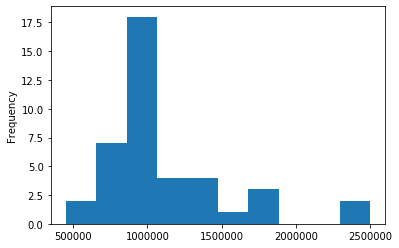

In [37]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==2)].plot(kind="hist")

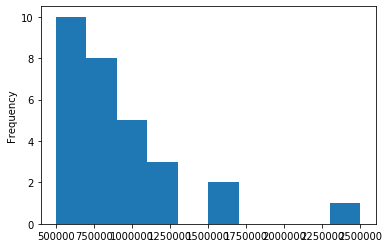

In [38]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==2)].plot(kind="hist")

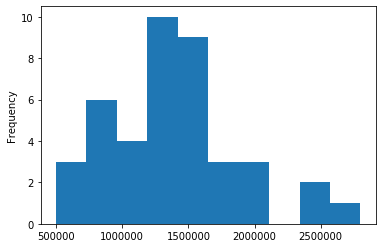

In [39]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==3)].plot(kind="hist")

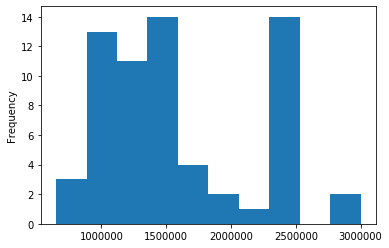

In [40]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==3)].plot(kind="hist")

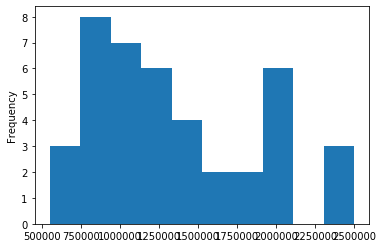

In [41]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==3)].plot(kind="hist")

In [42]:
#The distribution has a wide variation. It is possible type of area also determines price. We can make a feature for thsi
#create a feature that determines type of area a house is in based on price. 1 being lowest and 4 being highest type of area
train3['exec_flag']=1
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="gbagada") & (train3['price']>= 1700000)]= 2
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="yaba") & (train3['price']>= 1500000)]= 2
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="surulere") & (train3['price']>= 1500000)]= 2
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="gbagada") & (train3['price']>= 2000000)]= 3
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="yaba") & (train3['price']>= 1800000)]= 3
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="surulere") & (train3['price']>= 1800000)]= 3
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="gbagada") & (train3['price']>= 2350000)]= 4
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="yaba") & (train3['price']>= 2100000)]= 4
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="surulere") & (train3['price']>= 2200000)]= 4

In [43]:
## train3['exec_flag']=1
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="gbagada") & (train3['price']>= 2100000)]= 2
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="yaba") & (train3['price']>=2100000)]= 2
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="surulere") & (train3['price']>= 2400000)]= 2
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="gbagada") & (train3['price']>= 2200000)]= 3
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="yaba") & (train3['price']>= 2200000)]= 3
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="surulere") & (train3['price']>= 2500000)]= 3
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="gbagada") & (train3['price']>= 2300000)]= 4
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="yaba") & (train3['price']>= 2400000)]= 4
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="surulere") & (train3['price']>= 2400000)]= 4

In [44]:
#train3['exec_flag']=1
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="gbagada") & (train3['price']>= 500000)]= 2
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="yaba") & (train3['price']>=550000)]= 2
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="surulere") & (train3['price']>= 550000)]= 2
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="gbagada") & (train3['price']>= 600000)]= 3
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="yaba") & (train3['price']>= 620000)]= 3
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="surulere") & (train3['price']>= 620000)]= 3
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="gbagada") & (train3['price']>= 700000)]= 4
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="yaba") & (train3['price']>= 700000)]= 4
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="surulere") & (train3['price']>= 700000)]= 4

In [45]:
#Let us develop our first model to check RMSE. 
train_updated = train3[train3['id'].isin(train['id'])] 
test_updated = train3[train3['id'].isin(test['id'])] 

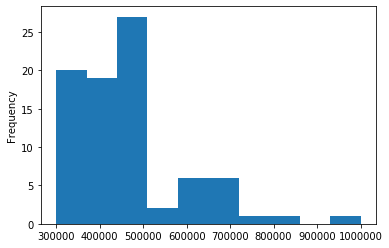

In [57]:
import matplotlib.pyplot as plt
train3['price'][train3['bedrooms']==1].plot(kind="hist")

In [66]:
threshold = np.percentile((train3['price'][train3['bedrooms']==1]),97.5)
threshold

747500.0000000001

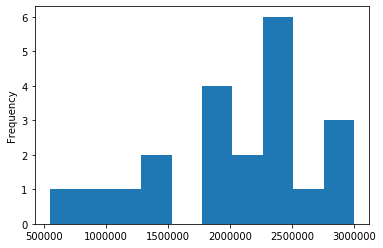

In [67]:
import matplotlib.pyplot as plt
train3['price'][train3['bedrooms']==4].plot(kind="hist")

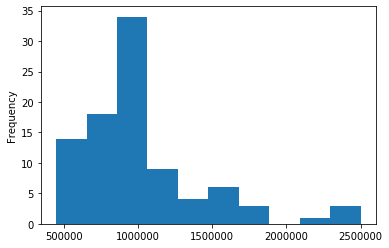

In [70]:
import matplotlib.pyplot as plt
train3['price'][train3['bedrooms']==2].plot(kind="hist")

In [69]:
threshold = np.percentile((train3['price'][train3['bedrooms']==4]),40)
threshold

2000000.0

In [283]:
#The above shows us that 1 bed, 3 bed and 4 bed are giving us high variation between predicted and actual
#we will need to do some more outlier analysis
#adjust outliers > than 2.5m
train3['price'][train3['price']>2500000] = 2600000
#Adjust 1 bed room outliers
train3['price'][(train3['bedrooms']==1) & (train3['price']>750000)]= 750000
#Adjust 4 bed room outliers
train3['price'][(train3['bedrooms']==4) & (train3['price']<2000000)]= 2000000

In [284]:
#Adjust various outliers especially low prices across various areas and types of houses
for location in ['gbagada','surulere','yaba']:
    train3['price'][(train3['location']==location)&(train3['bedrooms']==1)&(train3['price'] < train3['estate_price']- 50000)] = train3['estate_price']- 50000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==2)&(train3['price'] < train3['estate_price']- 50000)] = train3['estate_price']- 50000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==3)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    #this guy
    train3['price'][(train3['location']==location)&(train3['bedrooms']==4)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==5)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    #train3['price'][(train3['bedrooms']==1)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][(train3['bedrooms']==3)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][train3['price'] > 1800000] = 1

In [285]:
#Adjust two bedroom high prices
for location in ['gbagada','surulere','yaba']:
    train3['price'][(train3['location']==location)&(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price']+ 100000)] = train3['estate_price']+ 100000

In [286]:
train3.isnull().sum()

id                   0
bedrooms             0
bathrooms            0
toilets              0
parking              0
description          0
other_description    0
location             0
spec_location        0
price                0
estate_flag          0
terrace_flag         0
new_flag             0
serviced_flag        0
mini_flag            0
locationbed          0
estate_price         0
serviced_price       0
location_rank        0
new_price            0
miniflat_price       0
exec_flag            0
dtype: int64

In [287]:
train3.to_csv('housing data', index=False)

In [288]:
train3.columns

Index(['id', 'bedrooms', 'bathrooms', 'toilets', 'parking', 'description',
       'other_description', 'location', 'spec_location', 'price',
       'estate_flag', 'terrace_flag', 'new_flag', 'serviced_flag', 'mini_flag',
       'locationbed', 'estate_price', 'serviced_price', 'location_rank',
       'new_price', 'miniflat_price', 'exec_flag'],
      dtype='object')

In [289]:
#Split into train and test again for modelling
train_updated = train3[train3['id'].isin(train['id'])] 
test_updated = train3[train3['id'].isin(test['id'])] 

In [290]:
#modelling
x_train = train_updated[['bedrooms','bathrooms', 'toilets', 'parking','estate_flag','location_rank', 'terrace_flag', 'new_flag','exec_flag' ,'serviced_flag','mini_flag']]
y_train = train_updated['price']
x_cv = test_updated[['bedrooms','bathrooms', 'toilets', 'parking','estate_flag','location_rank', 'terrace_flag', 'new_flag','exec_flag' ,'serviced_flag','mini_flag']]
y_cv = test_updated['price']

In [291]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import r2_score
from math import sqrt

In [292]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=1, max_depth=11,n_estimators= 1400)
model1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [293]:
pred_cv = model1.predict(x_cv)
score = sqrt(mean_squared_error(y_cv,pred_cv))
print('mean_squared_error',score)
testing =test_updated.copy()
testing['pred'] = pred_cv

mean_squared_error 93658.0894957596


In [294]:
import joblib
filename = 'modelrf.pkl'
joblib.dump(model1, filename)


['modelrf.pkl']

In [295]:
testing['diff'] = abs(testing['pred']- testing['price'])
testing[['description', 'spec_location','bedrooms','bathrooms', 'toilets',
       'parking','estate_flag', 'terrace_flag', 'new_flag', 'serviced_flag','exec_flag','mini_flag','price','pred','diff']].sort_values("diff", ascending = False)

,description,spec_location,bedrooms,bathrooms,toilets,parking,estate_flag,terrace_flag,new_flag,serviced_flag,exec_flag,mini_flag,price,pred,diff
291,4 bedroom flat for rent,"Owukori, Alaka, Surulere, Lagos",4,3,3,0,0,0,0,0,1,0,2300000,1.988040e+06,311959.988156
320,4 bedroom terraced duplex for rent,"Medina, Gbagada, Lagos",4,4,5,3,1,1,1,1,4,1,2300000,2.575643e+06,275642.857143
337,2 bedroom flat for rent,"Close To Lsdpc Estate, Adekunle, Yaba, Lagos",2,2,3,2,1,0,1,1,1,1,1100000,8.273292e+05,272670.833333
264,2 bedroom flat for rent,"Sabo, Yaba, Lagos",2,2,2,2,1,0,1,1,1,1,1100000,8.277060e+05,272293.962585
304,2 bedroom flat for rent,"Yaba, Lagos",2,3,3,2,1,1,1,1,1,1,850000,1.105346e+06,255345.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1 bedroom mini flat for rent,"Yaba, Lagos",1,1,1,4,1,0,0,0,1,1,500000,4.996071e+05,392.857143
319,3 bedroom flat for rent,"Adeniran Ogunsanya, Surulere, Lagos",3,2,3,2,1,0,1,0,2,1,1500000,1.499763e+06,236.881868
318,1 bedroom mini flat for rent,"Yaba, Lagos",1,1,1,1,1,0,1,0,1,1,500000,4.999464e+05,53.571429
303,1 bedroom mini flat for rent,"Off Herbert Macaulay, Adekunle, Yaba, Lagos",1,1,1,1,1,0,2,0,1,1,500000,4.999464e+05,53.571429


In [296]:
output = pd.DataFrame({'id': test_updated.id,
                       'price': testing.pred})
output.to_csv('techidus solution.csv', index=False)

In [297]:
output_data = pd.read_csv('techidus solution.csv')
output_data.head(n=243)

,id,price
0,350,1.129850e+06
1,806,1.132279e+06
2,2638,1.105169e+06
3,3127,8.518518e+05
4,3885,2.544334e+06
...,...,...
98,97534,9.084804e+05
99,97547,2.544334e+06
100,99003,8.967054e+05
101,99021,1.303031e+06
